# LINEAR REGRESSION
## Linear regression is a linear machine learning algorithm for modelling the relationship between a scalar and one or more dependent variables.
### It is used to quantify the relationship between one or more predictor variables and a response variable.
### Correlation score gives a value between 0-1.0 value, the larger the value, the better the predicted model

In [87]:
#necessary libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# SIMPLE LINEAR REGRESSION

#### In this session, we will predict the SPREAD of USOIL daily prices using the volume accumulated in the previous day

In [88]:
#pandas settings to display all values
pd.set_option('display.max_rows',None)

#load the data
df = pd.read_csv('usoil_prices.csv',encoding='utf-16',sep="\t")

df.head()

,PRICE,VOLUME
0,75.773,27376
1,76.838,31341
2,76.868,30073
3,79.003,37806
4,78.455,29462


In [89]:
#spreaad
spread = []
spread.append(0)
for i in range(1,len(df.PRICE)):
    spread.append(abs(df.PRICE[i] - df.PRICE[i-1]) * 100)
    
df['SPREAD'] = spread
df.head()

,PRICE,VOLUME,SPREAD
0,75.773,27376,0.0
1,76.838,31341,106.5
2,76.868,30073,3.0
3,79.003,37806,213.5
4,78.455,29462,54.8


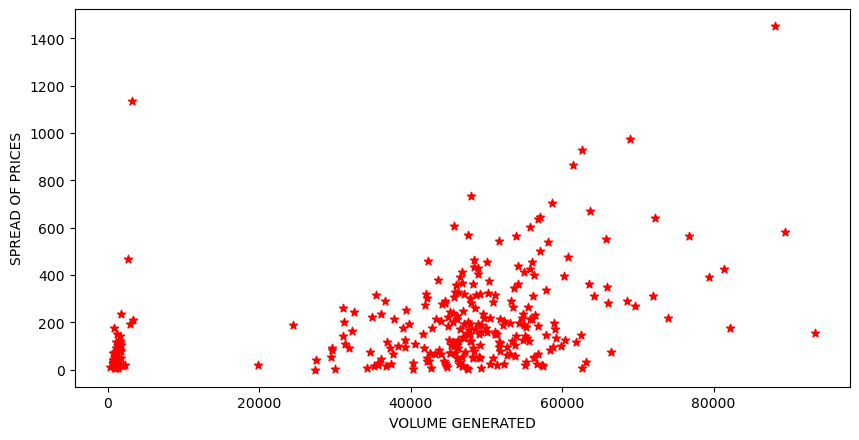

In [90]:
#plotting scatter plot of volume price
%matplotlib inline
plt.figure(figsize=(10,5), dpi=100)
plt.xlabel('VOLUME GENERATED')
plt.ylabel('SPREAD OF PRICES')
plt.scatter(df['VOLUME'], df.SPREAD,color="red",marker="*")

plt.show()

In [92]:
#training the model by fitting the model with the data
regression = linear_model.LinearRegression()
X = np.array(df['VOLUME']).reshape(-1,1)
y = np.array(df.SPREAD).reshape(-1,1)
regression.fit(X,y)

regression.score(X,y)

0.14995326446031254

In [31]:
#predicting the price with a volume of 10000
predict_val = np.array(1000).reshape(-1,1)

regression.predict(predict_val)

array([[43.66141637]])

In [16]:
#gradient
regression.coef_

array([[0.00370089]])

In [18]:
#intercept
regression.intercept_

array([39.96053001])

# MULTI-VARIABLE LINEAR REGRESSION

#### In this session, we will predict the closing price of USOIL considering the open price and volume generated that day 

In [95]:
#pandas settings to display all values
pd.set_option('display.max_rows',None)

#load the data
df = pd.read_csv('usoil_prices_B.csv',encoding='utf-16',sep="\t")

df.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
0,75.595,76.257,74.098,75.773,NaN
1,75.772,77.457,75.530,76.838,31341.0
2,76.836,78.262,76.317,NaN,30073.0
3,76.869,79.726,76.388,79.003,NaN
4,79.001,79.945,78.156,78.455,29462.0


In [96]:
#DATA-PREPROCESSING - fill all None Values with the mean price
df.OPEN  = df.OPEN.fillna(df.OPEN.mean())
df.CLOSE = df.CLOSE.fillna(df.CLOSE.mean())
df.VOLUME = df.VOLUME.fillna(df.VOLUME.mean())

df.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
0,75.595,76.257,74.098,75.773000,41642.996644
1,75.772,77.457,75.530,76.838000,31341.000000
2,76.836,78.262,76.317,94.195957,30073.000000
3,76.869,79.726,76.388,79.003000,41642.996644
4,79.001,79.945,78.156,78.455000,29462.000000


In [107]:
#now train model
model = linear_model.LinearRegression()
model.fit(df[['VOLUME','OPEN']],df.CLOSE)

LinearRegression()

In [106]:
model.score(df[['VOLUME','OPEN']],df.CLOSE)

0.9381445221568425

In [112]:
#we can now make predictions
model.predict([[30000,79.002]])

array([79.57933995])